<a href="https://colab.research.google.com/github/kdkalvik/gaussian-processes-tutorial/blob/main/gaussian_processes_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A multivariate Gaussian distribution's mean and covariance matrices can be partitioned. Consider the gaussian distributed random variable
$
y = \begin{bmatrix}
    y_A \\
    y_B \\
    \end{bmatrix} 
$
, with mean 
$
\mu = \begin{bmatrix}
      \mu_A \\
      \mu_B \\
      \end{bmatrix} 
$ 
and covariance matrix
$
\Sigma = \begin{bmatrix}
         \Sigma_{AA} \ \ \Sigma_{AB}\\
         \Sigma_{BA} \  \ \Sigma_{BB}\\
         \end{bmatrix} 
$.
It has the following properties:

1. Normalization:

 The integral of a gaussian distributed random variable is equal to 1.
$$
\int_{y}p(y)dy = 1
$$

2. Summation:

 The distribution of the sum of two random variables follows a gaussian distribution if both random variables are gaussian distributed.
$$
y_A \sim \mathcal{N}(\mu_A, \Sigma_{AA}) \ \ \ and \ \ \ y_B \sim \mathcal{N}(\mu_B, \Sigma_{BB}) \\
y_A+y_B \sim \mathcal{N}(\mu_A+\mu_B, \Sigma_A+\Sigma_B)
$$

3. Conditioning:
 
 The conditioning of a gaussian distributed random variable results in a gaussian distributed posterior. Moreover, the posterior's mean and covariance can be calculated analytically, this is not always possible for most other distributions. 
$$
p(y_A|y_B) = \frac{p(y_A, y_B)}{\int_{y_A}{p(y_A,y_B)}} \ \ \
           = \frac{p(y_B|y_A)p(y_A)}{\int_{y_A}{p(y_A,y_B)}} \\
y_A|y_B \sim \mathcal{N}(\mu_A+\Sigma_{AB}\Sigma^{-1}_{BB}(y_B-\mu_B), \
              \Sigma_{AA}-\Sigma_{AB}\Sigma^-1_{BB}\Sigma_{BA})
$$

4. Marganilization:

 Marganilization of a variable from a multivariate gaussian distribution results is a gaussian distributed posterior. 
$$
\begin{align}
p(y_A) = \int_{y_B}p(y_A, y_B)dy_B \\
y_A = \mathcal{N}(\mu_A, \Sigma_{AA})
\end{align}
$$



# **Gaussian Processes**

A collection of random variables is called a Gaussian Process(GPs) if the joint distribution of any finite number of its members is a Gaussian. Gaussian processes can be thought of as a reinterpretation or a generalization of Gaussian distributions. So, before one can get into the details of GPs, we need to understand the Gaussian distribution and some of its properties. 

# Gaussian Distributions
A random variable $y$ is said to have a Gaussian distribution $y \sim \mathcal{N}(\mu, \Sigma)$ with mean $\mu$ and covariance $\Sigma$ if its probability density function is
$$
p(y|\mu, \Sigma) = \frac{1}{(2\pi)^\frac{d}{2}|\Sigma|}e^{\frac{-1}{2}(({x-\mu})^T\Sigma^{-1}({x-\mu}))}
$$

Gaussian distributions have a lot of intresting properties, for brevity the following are the ones most relevant to GPs:
Furthermore, 
A multivariate Gaussian distribution's mean and covariance matrices can be partitioned. Consider the gaussian distributed random variable
It has the following properties:

* **Normalization**: The integral of a gaussian distributed random variable is equal to 1.

* **Summation**: The sum of Gaussian distributed random variables follows a Gaussian distribution. 

* **Conditioning**: Conditioning random variables from a multivariate Gaussian distribution results in a Gaussian distributed posterior.

* **Marganilization**: Marganilizing random variables from a multivariate Gaussian distribution results in a Gaussian distributed posterior.

# 1D Gaussian Distribution
In a one dimensional Gaussian distribution, the covariance matrix is actually a scalar value which represents the variance $\sigma$ of the variable.


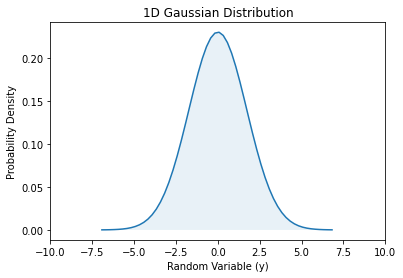

In [ ]:
#@title  { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0 #@param {type:"slider", min:-5, max:5, step:1}
variance = 3 #@param {type:"slider", min:1, max:5, step:1}
std = np.sqrt(variance)
x = np.arange(mean-(4*std), mean+(4*std), 0.25)
y = norm.pdf(x,mean,std)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, y, 0, alpha=0.1)
ax.set_xlim([-10, 10])
ax.set_xlabel('Random Variable (y)')
ax.set_ylabel('Probability Density')
ax.set_title('1D Gaussian Distribution')
plt.show()

# 2D Gaussian Distribution
In a two dimensional Gaussian distribution:
* The mean of a 2D gaussian distribution is a vector of length $2$. Each dimension of the vector corresponds to the mean along that dimension. 

* The covariance matrix of a 2D gaussian distribution is a $2\times2$ matrix. The diagonal elements represent a dimension's variance, while the off-diagonal elements represent the covariance between two dimensions. Graphically, the off-diagonal elements control the skew of the distribution.

* A covariance matrix, by definition, is symmetric positive semi-definite.

* Geometrically, conditioning (distribution of one variable when we know the value of the other) in a 2D Gaussian looks like slicing the plot of the probability density function along the unknown variables' axis at the known variables' value.

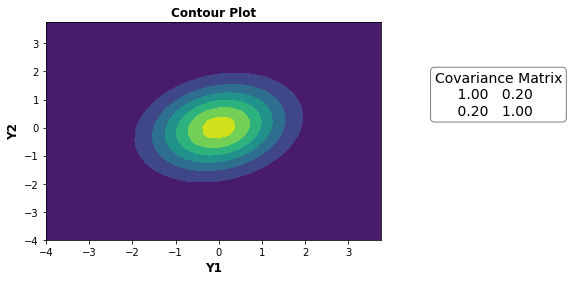

In [ ]:
#@title  { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.stats import norm, multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#@markdown Value of the off-diagonal elements in the covariance matrix
off_diag_cov = 0.2 #@param {type:"slider", min:0, max:0.9, step:0.1}
off_diag_cov = float(off_diag_cov)

rv = multivariate_normal([0, 0], [[1.0, off_diag_cov], [off_diag_cov, 1.0]])
Y1 = np.arange(-4, 4, 0.25)
Y2 = np.arange(-4, 4, 0.25)
y1, y2 = np.meshgrid(Y1, Y2)
z = rv.pdf(np.dstack((y1, y2)))

#plot contour plot of 2D gaussian 
fig = plt.figure()
plt.title("Contour Plot", fontsize=12, fontweight ='bold') 
plt.xlabel('Y1', fontsize=12, fontweight ='bold') 
plt.ylabel('Y2', fontsize=12, fontweight ='bold') 
plt.contourf(y1, y2, z, cmap='viridis')
textstr = "Covariance Matrix\n     {:.2f}   {:.2f}\n     {:.2f}   {:.2f}".format(1.0, 
                                                                               off_diag_cov, 
                                                                               off_diag_cov,
                                                                               1.0)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(5.0, 2.0, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.show()

#plot 3D plot of 2D gaussian 
def data_gen(i):
    ax.clear()
    y1, y2 = np.meshgrid(Y1, Y2[-(i+2):])
    z = rv.pdf(np.dstack((y1, y2)))
    z[0, :] = 0

    plot = ax.plot_surface(y1, y2, z, cmap='viridis')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(0, max_z)
    ax.set_xlabel('Y1', fontsize=12, fontweight ='bold') 
    ax.set_ylabel('Y2', fontsize=12, fontweight ='bold') 
    ax.set_zlabel('P(Y1,Y2)', fontsize=12, fontweight ='bold') 
    ax.set_title(r"$\bf{p(Y1|Y2)}$" + "\nThe silder corresponds to the Y2 value",
                 fontsize=12) 
    return plot

fig = plt.figure()
ax = fig.gca(projection='3d')
plt.close()
max_z = np.max(z)
animation.FuncAnimation(fig, data_gen, frames=len(z))

Now that we are familar Gaussian Distributions and some of its properties, let's move on to GPs. We will get an intuitive understanding of GPs, after which we will look at the math and some of its implementational details.

In order to get an intutive understanding of GPs we need to looks at Gaussian distributions with a visualization method introduced by David MacKay. Consider the 2D gaussian distribution with mean $\mu=0$ and covariance matrix $\Sigma$. Instead of plotting the covariance matrix as a contour plot, we will use a scatter plot. In the contour plot we considered before, each axis of the plot corresponded to each distribution variable. Here, in the scatter plot, we use the vertical axis to represent the range of values any variable can take. The horizontal axis corresponds to the variable index. In a 2D gaussian, we have two variables, so the first point on the horizontal axis is the first variable, and the second variable is the second point.

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-new-viz.PNG?raw=true)

If we sample data points from the 2D gaussian distribution and plot the points in both the contour and scatter plot, we can see how the contour plot and scatter plots relate to each other. 

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-2D.gif?raw=true)

So, what would happen if we know the value of a variable? That point would be fixed in the scatter plot while the other point will be able to move along the vertical axis and would now be sampled from a gaussian conditioned on the known value of the first variable. 

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-2D-cond.gif?raw=true)

If we consider a 5D gaussian, we get the following plot. Remember, a 5D gaussian would have 25 contour plots, one for each entry of the covariance matrix. Since, each contour plot can only show the correlation between 2 variable combinations, only one of the contours plots is shown. 

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-5D.gif?raw=true)

We start to see a line or something that looks like a 1D function forming. If we know the value of one or more variables, we can condition on them and only sample the unknown variables. The variables with know values will stay fixed while the others are free to move along the vertical axis according to their conditional distribution.

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-5D-cond.gif?raw=true)

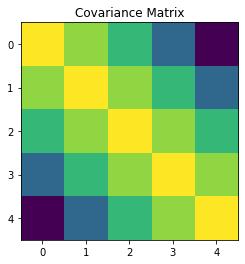

In [ ]:
#@title  { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.stats import multivariate_normal

def get_cond_predictions(cov, cond_labels, cond_inds, size=1):
  '''
  Generates samples from gaussian distribution defined by 0 mean and 
  cov as the covariance matrix, and conditioned on variables defined by 
  cond_labels, cond_inds.

  Args:
      cov:         Covariance Matrix, numpy array (n x n)
      cond_labels: Values of data points that are known, float list [m]
      cond_inds:   Indices of dimensions with known data points, int list [m]
      size:        Number of data points to sample from conditional

  Returns:
      Samples generated from the distribution
  '''
  # get indices of unconitioned dimensions, int list [n-m]
  not_cond_inds = np.delete(np.arange(len(cov)), cond_inds)

  # partition covariance matrix in AA, AB and BB
  AA = cov[not_cond_inds][:, not_cond_inds]
  AB = cov[not_cond_inds][:, cond_inds]
  BB = cov[cond_inds][:, cond_inds]

  # marganilize conditioned variables
  BB_inv = np.linalg.inv(BB)
  cond_cov = AA-AB@BB_inv@AB.T
  cond_mean = AB@BB_inv@np.array(cond_labels).T

  preds = np.random.multivariate_normal(cond_mean, 
                                        cond_cov, 
                                        size)

  # pack conditioned and predictions into a single tensor
  data = np.ones((size, len(cov)))
  data[:, cond_inds] *= cond_labels
  data[:, not_cond_inds] = preds
  return data

def kernel(X1, X2, l=1.0, sigma_f=1.0):
  '''
  Isotropic squared exponential kernel. Computes 
  a covariance matrix from points in X1 and X2.
  It is also known as radial basis function (RBF).

  Args:
      X1: Array of m points (m x d).
      X2: Array of n points (n x d).

  Returns:
      Covariance matrix (m x n).
  
  http://krasserm.github.io/2018/03/19/gaussian-processes/
  '''
  sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
  return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def animate(i):
  x = np.arange(uncond_preds.shape[1])+1
  y = uncond_preds[i]
  line.set_data(x, y)
  line1.set_data(x, y)
  return (line,)
  
# define the covariance matrix
cov = np.array([[1.0, 0.9, 0.8, 0.6, 0.4],
                [0.9, 1.0, 0.9, 0.8, 0.6], 
                [0.8, 0.9, 1.0, 0.9, 0.8], 
                [0.6, 0.8, 0.9, 1.0, 0.9], 
                [0.4, 0.6, 0.8, 0.9, 1.0]])

#@markdown **You can use your own covariance matirx by updating the code!**

#@markdown Indices of variables with known y value. (comma seperated integers [1-5])
cond_inds = "1, 4" #@param {type:"string"}
#@markdown y values of **cond_inds** (comma seperated floats)
cond_labels = "1.5, 0" #@param {type:"string"}

# Known dimension values to condition on
cond_labels = np.array([float(i) for i in cond_labels.split(',')])
cond_inds = np.array([int(i) for i in cond_inds.split(',')])

# Generate data
uncond_preds = get_cond_predictions(cov, 
                                    cond_labels=cond_labels, 
                                    cond_inds=cond_inds-1, 
                                    size=20)


## Plot covariance and sampled data
plt.imshow(cov)
plt.title('Covariance Matrix')
plt.show()

fig, ax = plt.subplots()
plt.close()
ax.set_xlim((0.8, len(cov)+0.2))
ax.set_ylim((-4, 4))
ax.set_xlabel("Variable Index")
ax.set_ylabel("y")
ax.set_xticks(range(1,6))
line, = ax.plot([], [], 
                color='C0', 
                marker='o', 
                markerfacecolor='C0')
line1, = ax.plot([], [], 
                 marker='o', 
                 markerfacecolor='C1', 
                 markevery=list(cond_inds-1))

animation.FuncAnimation(fig, animate, 
                        init_func=(line.set_data([], [])),
                        frames=len(uncond_preds))

In higher dimensions, the covariance matrix is represented as an image since printing all the values would be cumbersome. In the 20D Gaussian, we start to see a waveform sampled from the gaussian distribution. Each of these waveforms is essentially a function that is sampled from the gaussian.

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-20D.gif?raw=true)

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-20D-cond.gif?raw=true)



# Gaussian Processes
Gaussian Processes are $\infty$ dimensional Gaussian distributions. Each variable index is mapped to a data point $x$. If the label or $y$ value of a data point is know, the variable is used to condition the Gaussian disribution and sample the labels for data points without labels. This process raises several questions:
* How do we decide the variable indices for data points? 
* How do we get the covariance matrix of an $\infty$D distribution? 
* How do we decide which of the generated values should be considered as the model prediction? 

We use the data points themselves to represent the variable indices. In the case of one dimensional data(the dimension here refers to the dataset's dimension, not the gaussian generating the data), the horizontal axis can be the data's $x$ value. In higher dimensional data, we define a function which  tells how close/correllated a pair of data points are. We call such a function a kernel function. They take a pair of data points(the kernel function only depends on the inputs and not the corresponding labels of the data) and return a real value $[0, \infty)$. Also, the vertical axis of our visualization corresponds to the labels of our data i.e., the $\infty$D gaussian is only modeling the distribution of the datasets' labels and the datasets' inputs are used to determine where each variable is on the horizontal axis of our scatter plot. We assume our labels $y$ are one dimensional, vanilla GPs cannot handle multidimensional data, although there are variants which can model multidimentional labels.

If the GP is a multidimensional distribution, does that mean we need to somehow compute and store an $\infty$D covariance matrix? Well no, since the kernel function is giving us a mearuse of how corellated a pair of variables are, we can just use that and need not store the whole thing. Moreover, we will soon see that we only need to keep the covariance matrix parts corresponding to variables whose labels are available. Since we use a function to generate the covariance matrix, it also takes care of figuring out the actual covariance matrix. We assume the kernel function gives us the real underlying covariance matrix. 

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/GP-Inf.jpg?raw=true)

Finally, that leaves the question of figuring out which of the generated values to pick as the true function value. This is where we start to see one of the most exciting parts of Gaussian processes and even Bayesian methods in general. If we sample infinitely many points for each variable, it is akin to sampling infinitely many functions that pass through the data points we know. We can then take the mean and variance of the functions at each data point. This way, we predict the labels of new data points and our uncertainty in a prediction. If a prediction has high variance, we are not very confident about our prediction and vice-versa. 

But does that mean we have to sample an infinite number of data points from the gaussian distribution to get our mean and variance? Well, no, we do not. Because we are just dealing with a high dimensional gaussian distribution, we can analytically compute each data point's mean and variance having to sample data from the distribution. This means we can look at infinitely many functions that explain our data and make a prediction based on their collective information.

Now that we know how the intuitive model we built can be generalized to real data, let us now formalize the kernel function. You might have already guessed it by now; the kernel function decides how well our GP performs. Our performance will be acceptable only If the function accurately predicts the actual covariance matrix of the data. Well, in most cases, we make certain assumptions about the data, and it is correlated. One of the most used kernel functions is the radial basis function(RBF):

$K(x_1, x_2) = \sigma^2 e^{(\frac{-1}{2l^2}|x_1-x_2|)}$. 

Two variables parametrize it:
* horizontal scale $l$: Controls how correlated points next to one other are.
* vertical scale $\sigma$: Controls how quickly our uncertainty rises as we move away from a point with low uncertainty.

![](https://github.com/kdkalvik/gaussian-processes-tutorial/blob/main/images/RBF.PNG?raw=true)

Another thing I should mention is how to address the noise in available data. The plots we have seen so far assume the red data points whose labels we have access to have no noise. So, the functions generated from such a GP would pass strictly through such points. But, in some cases, the available data could contain noise. We can model it by adding a diagonal matrix with the individual data points' variance to the covariance matrix.

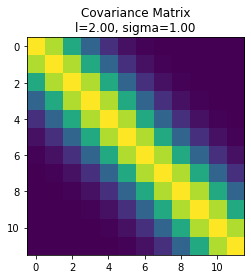

In [ ]:
#@title  { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.stats import multivariate_normal

#@title RBF nD-Gaussian Conditioning
def get_cond_predictions(cov, cond_labels, cond_inds, size=1, noise=0.1):
  '''
  Generates samples from gaussian distribution defined by 0 mean and 
  cov as the covariance matrix, and conditioned on variables defined by 
  cond_labels, cond_inds.

  Args:
      cov:         Covariance Matrix, numpy array (n x n)
      cond_labels: Values of data points that are known, float list [m]
      cond_inds:   Indices of dimensions with known data points, int list [m]
      size:        Number of data points to sample from conditional

  Returns:
      Samples generated from the distribution
  '''
  # get indices of unconitioned dimensions, int list [n-m]
  not_cond_inds = np.delete(np.arange(len(cov)), cond_inds)

  # partition covariance matrix in AA, AB and BB
  AA = cov[not_cond_inds][:, not_cond_inds]
  AB = cov[not_cond_inds][:, cond_inds]
  BB = cov[cond_inds][:, cond_inds]

  # marganilize conditioned variables
  BB_inv = np.linalg.inv(BB)
  cond_cov = AA-AB@BB_inv@AB.T
  cond_mean = AB@BB_inv@np.array(cond_labels).T

  preds = np.random.multivariate_normal(cond_mean, 
                                        cond_cov, 
                                        size)

  cond_labels = np.random.normal(scale=noise, size=(size, len(cond_labels))) + \
                np.array(cond_labels).reshape(1, -1)

  # pack conditioned and predictions into a single tensor
  data = np.ones((size, len(cov)))
  data[:, cond_inds] *= cond_labels
  data[:, not_cond_inds] = preds
  return data

def kernel(X1, X2, l=1.0, sigma_f=1.0):
  '''
  Isotropic squared exponential kernel. Computes 
  a covariance matrix from points in X1 and X2.
  It is also known as radial basis function (RBF).

  Args:
      X1: Array of m points (m x d).
      X2: Array of n points (n x d).

  Returns:
      Covariance matrix (m x n).
  
  http://krasserm.github.io/2018/03/19/gaussian-processes/
  '''
  sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
  return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def animate(i):
  x = np.arange(uncond_preds.shape[1])+1
  y = uncond_preds[i]
  line.set_data(x, y)
  line1.set_data(x, y)
  return (line,)

#@title { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }

#@markdown Number of dimensions in the Gaussian Distribution
gaussian_dim = 12 #@param {type:"slider", min:2, max:100, step:1}

#@markdown Kernel function parameter <b>𝑙</b>
kernel_l = 2 #@param {type:"slider", min:1, max:10, step:1}

#@markdown Kernel function parameter <b>σ</b>
kernel_sigma = 1 #@param {type:"slider", min:1, max:10, step:1}

#@markdown Indices of dimensions for which we know the y value. Comma separated list of floats (Has to be grater than 0 and less than gaussian_dim)
cond_inds = "1, 5, 10" #@param {type:"string"}
#@markdown y values of cond_inds
cond_labels = "1, 0.2, 0.5" #@param {type:"string"}
#@markdown sigma of gaussian noise(0 mean) added to known data points 
cond_noise = 0.1 #@param {type:"slider", min:0, max:1, step:0.1}

# Known dimension values to condition on
cond_labels = np.array([float(i) for i in cond_labels.split(',')])
cond_inds = np.array([int(i) for i in cond_inds.split(',')])

# Generate Covariance matrix
x = np.arange(gaussian_dim).reshape(-1, 1)
cov = kernel(x, x, l=float(kernel_l), sigma_f=float(kernel_sigma))

# Generate data
uncond_preds = get_cond_predictions(cov, 
                                    cond_labels=cond_labels, 
                                    cond_inds=cond_inds-1, 
                                    size=20,
                                    noise=cond_noise)


## Plot covariance and sampled data
plt.imshow(cov)
plt.title('Covariance Matrix\nl={:.2f}, sigma={:.2f}'.format(kernel_l, 
                                                             kernel_sigma))
plt.show()

fig, ax = plt.subplots()
plt.close()
ax.set_xlim((0.8, len(cov)+0.2))
ax.set_ylim((-4, 4))
ax.set_xlabel("Variable Index")
ax.set_ylabel("y")
line, = ax.plot([], [], 
                color='C0', 
                marker='o', 
                markerfacecolor='C0')
line1, = ax.plot([], [], 
                 marker='o', 
                 markerfacecolor='C1', 
                 markevery=list(cond_inds-1))

animation.FuncAnimation(fig, animate, 
                        init_func=(line.set_data([], [])),
                        frames=len(uncond_preds))

# References

* https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote15.html
* https://thegradient.pub/gaussian-process-not-quite-for-dummies/
* http://cbl.eng.cam.ac.uk/pub/Public/Turner/News/imperial-gp-tutorial.pdf
* http://www.gaussianprocess.org/gpml/
* http://www.cs.cmu.edu/~andrewgw/andrewgwthesis.pdf  


